In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from logistics import new_cav_model , J_analytical_new, fourier_transform_matrix, fast_f_t, spectrum_1
from logistics_exact_cavity import Driven_cavity_class,two_modes_cavity
from numpy.fft import fft,fftfreq
from scipy.interpolate import interp1d	
from matplotlib import gridspec

plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['mathtext.rm'] = 'serif'
plt.rcParams['font.size'] = 14  


From today's meeting, we agreed that a Thorough exploration of the spectrum needs to be done. The message I take is
1. verify the fourier transform. change dt and t_max
2. it is more interesting to show what happens when $\gamma \tau $ grows 

# 0. trash (delete in the future)

In [ ]:
def average_fft(x, y, Ms):
	spectra = []
	freqs_list = []

	for M in Ms:
		omega, A = fast_f_t(x, y, M)
		freqs_list.append(omega)
		spectra.append(A)

	omega_min = max(freqs[0] for freqs in freqs_list)     # límite inferior común
	omega_max = min(freqs[-1] for freqs in freqs_list)    # límite superior común
	N_common = max(len(f) for f in freqs_list)            # densidad similar a la mayor
	omega_common = np.linspace(omega_min, omega_max, N_common)


	spectra_interp = []
	for omega, A in zip(freqs_list, spectra):
		f_interp = interp1d(omega, A, kind='linear', bounds_error=False, fill_value=0.0)
		spectra_interp.append(f_interp(omega_common))

	A_avg = np.mean(spectra_interp, axis=0)

	return omega_common, A_avg

In [4]:
gamma = 0.8
phi = 2*np.pi
tau = 1 
t_max = 200 * tau
dt = tau/100


In [4]:
model = new_cav_model(gamma,phi,tau)
model.evolve(t_max,dt)
t,e = model.excited_state([1,0])
a_out_flat = model.a_out_array[:,2]


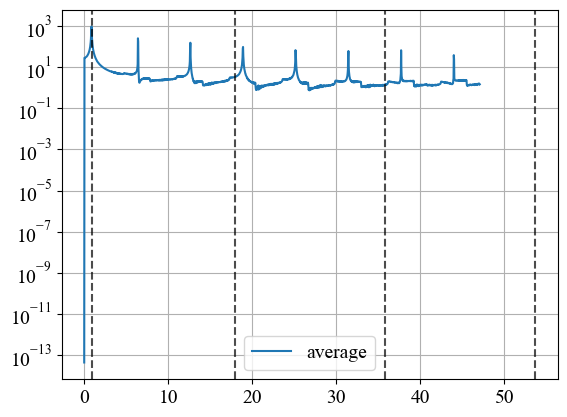

In [5]:
M_flatten = np.arange(3000,3051,1)
w_def,u_def = average_fft(t,a_out_flat,M_flatten)

plt.plot(w_def,u_def,label='average')
plt.grid()
plt.legend()
plt.axvline(np.sqrt(gamma/tau),linestyle='--',color='k',alpha = 0.7)
plt.axvline(20*np.sqrt(gamma/tau),linestyle='--',color='k',alpha = 0.7)
plt.axvline(40*np.sqrt(gamma/tau),linestyle='--',color='k',alpha = 0.7)
plt.axvline(60*np.sqrt(gamma/tau),linestyle='--',color='k',alpha = 0.7)
#plt.axvline(np.sqrt(gamma/tau))
plt.yscale('log')
plt.show()

In [ ]:
from joblib import Parallel, delayed

def paralelizar(parameter_list,f,ncores: int = 65):
	resultados = Parallel(n_jobs=ncores, backend='loky')(
		delayed(f)(param) for param in parameter_list
	)
	return resultados


# 1. Spectrum as a function of $\gamma \tau $ 

In [ ]:
phi = 2*np.pi
tau = 1 
t_max = 200 * tau
dt = tau/75
gamma_0 = 5

gamma_values = np.linspace(0.05,200,1000)
M_flatten = np.arange(4000,4101,1)

def sample_gamma(gamma_value):
	model = new_cav_model(gamma_value,phi,tau)
	model.evolve(t_max,dt)
	t,_ = model.excited_state([1,0])
	a_out_flat = model.a_out_array[:,2]
	w,u = average_fft(t,a_out_flat,M_flatten)
	return w,u

In [171]:
prueba = paralelizar(gamma_values,sample_gamma)
w = np.asarray(prueba[0][0])
u_map = np.asarray( [data[1] for data in prueba])

In [ ]:
phi = 2*np.pi
tau = 1 
t_max = 200 * tau
dt = tau/75
gamma_0 = 5

gamma_values = np.linspace(0.05,200,1000)
M_flatten = np.arange(4000,4101,1)

def sample_gamma_2pi_18(gamma_value):
	phi_s = 2*np.pi
	tau_s = 1.86 
	model = new_cav_model(gamma_value,phi_s,tau_s)
	model.evolve(t_max,dt)
	t,_ = model.excited_state([1,0])
	a_out_flat = model.a_out_array[:,2]
	w,u = average_fft(t,a_out_flat,M_flatten)
	return w,u

def sample_gamma_pi_18(gamma_value):
	phi_s = np.pi
	tau_s = 1.86 
	model = new_cav_model(gamma_value,phi_s,tau_s)
	model.evolve(t_max,dt)
	t,_ = model.excited_state([1,0])
	a_out_flat = model.a_out_array[:,2]
	w,u = average_fft(t,a_out_flat,M_flatten)
	return w,u

def sample_gamma_pi_1(gamma_value):
	phi_s = np.pi
	tau_s = 1
	model = new_cav_model(gamma_value,phi_s,tau_s)
	model.evolve(t_max,dt)
	t,_ = model.excited_state([1,0])
	a_out_flat = model.a_out_array[:,2]
	w,u = average_fft(t,a_out_flat,M_flatten)
	return w,u

def sample_gamma_pi_halfed(gamma_value):
	phi_s = np.pi/2
	tau_s = 1
	model = new_cav_model(gamma_value,phi_s,tau_s)
	model.evolve(t_max,dt)
	t,_ = model.excited_state([1,0])
	a_out_flat = model.a_out_array[:,2]
	w,u = average_fft(t,a_out_flat,M_flatten)
	return w,u

def sample_gamma_any(gamma_value):
	phi_s = 1.76*np.pi
	tau_s = 0.8
	model = new_cav_model(gamma_value,phi_s,tau_s)
	model.evolve(t_max,dt)
	t,_ = model.excited_state([1,0])
	a_out_flat = model.a_out_array[:,2]
	w,u = average_fft(t,a_out_flat,M_flatten)
	return w,u


In [176]:
data_2p_18 = paralelizar(gamma_values,sample_gamma_2pi_18)
w_2p_18 = np.asarray(data_2p_18[0][0])
u_map_2p_18 = np.asarray( [data[1] for data in data_2p_18])

data_p_18 = paralelizar(gamma_values,sample_gamma_pi_18)
w_p_18 = np.asarray(data_p_18)
u_map_p_18 = np.asarray( [data[1] for data in data_p_18])

data_p_1 = paralelizar(gamma_values,sample_gamma_pi_1)
w_p_1 = np.asarray(data_p_1)
u_map_p_1 = np.asarray( [data[1] for data in data_p_1])

In [192]:
data_p_half = paralelizar(gamma_values,sample_gamma_pi_halfed)
w_p_half = np.asarray(data_p_half)
u_map_p_half = np.asarray( [data[1] for data in data_p_half])

In [382]:
gamma_values_fast = np.linspace(0.05,200,300)

data_any = paralelizar(gamma_values_fast,sample_gamma_any)
w_p_any = np.asarray(data_any)
u_map_any = np.asarray( [data[1] for data in data_any])

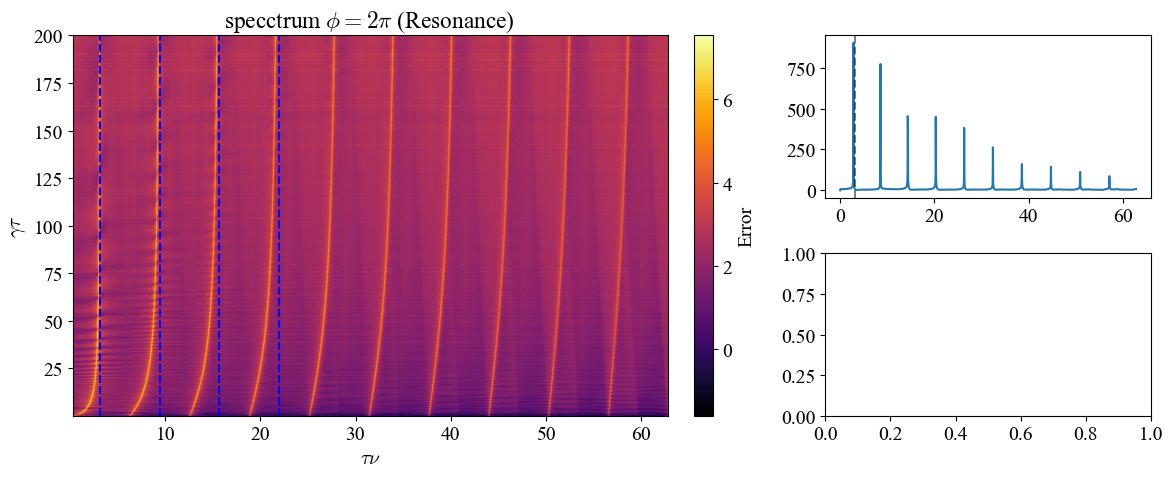

In [ ]:
# ---- plot phi=2pi tau =1-------------
map_plot = u_map[:,10:]
fig = plt.figure(figsize=(12, 5))
gs = gridspec.GridSpec(2, 2, width_ratios=[2, 1], height_ratios=[1, 1], figure=fig)

ax_heat = fig.add_subplot(gs[:, 0])
im = ax_heat.imshow(
	np.log(map_plot),
	origin='lower',
	aspect='auto',
	extent=[ w[10], w[-1],gamma_values[0], gamma_values[-1],],
	cmap='inferno'
)
ax_heat.set_xlabel(r'$  \tau \nu  $')
ax_heat.set_ylabel(r"$\gamma \tau $")
ax_heat.set_title(r'specctrum $\phi = 2\pi  $ (Resonance) ')

ax_heat.axvline(np.pi, color='b', linestyle='--', linewidth=1.5)
ax_heat.axvline(3*np.pi, color='b', linestyle='--', linewidth=1.5)
ax_heat.axvline(5*np.pi, color='b', linestyle='--', linewidth=1.5)
ax_heat.axvline(7*np.pi, color='b', linestyle='--', linewidth=1.5)


cbar = fig.colorbar(im, ax=ax_heat, fraction=0.046, pad=0.04)
cbar.set_label('Error')

ax_top = fig.add_subplot(gs[0, 1])
ax_top.plot(w,u_map[180,:])
ax_top.axvline(np.pi/tau,color='k',linestyle ='--',alpha = 0.5)

ax_bottom = fig.add_subplot(gs[1, 1])

plt.tight_layout()
plt.show()

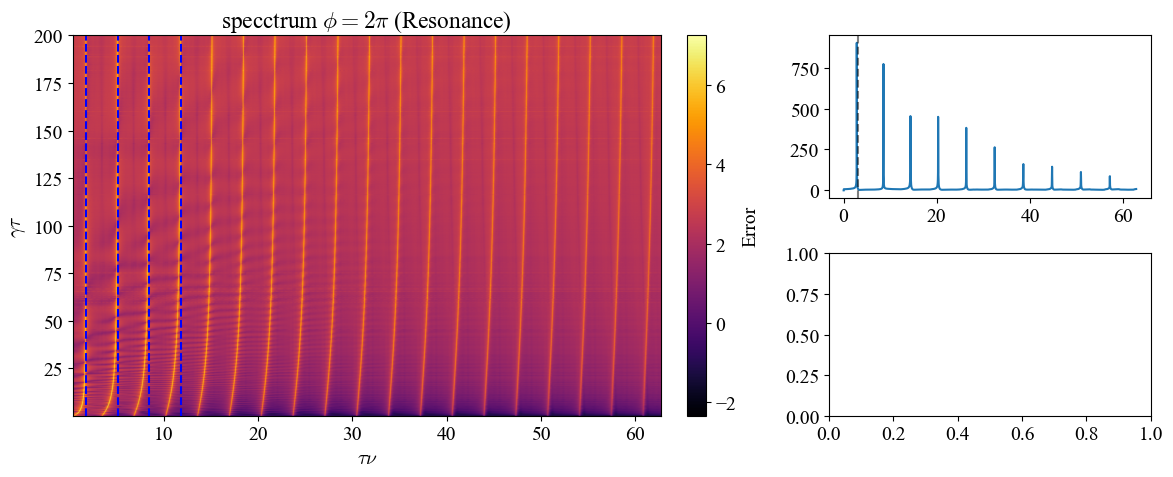

In [ ]:
# --------plot phi=2p tau = 1.86 -------------
map_plot_2 = u_map_2p_18[:,10:]
t18 = 1.86
fig = plt.figure(figsize=(12, 5))
gs = gridspec.GridSpec(2, 2, width_ratios=[2, 1], height_ratios=[1, 1], figure=fig)

ax_heat = fig.add_subplot(gs[:, 0])
im = ax_heat.imshow(
	np.log(map_plot_2),
	origin='lower',
	aspect='auto',
	extent=[ w[10], w[-1],gamma_values[0], gamma_values[-1],],
	cmap='inferno'
)
ax_heat.set_xlabel(r'$  \tau \nu  $')
ax_heat.set_ylabel(r"$\gamma \tau $")
ax_heat.set_title(r'specctrum $\phi = 2\pi  $ (Resonance) ')

ax_heat.axvline(np.pi/t18, color='b', linestyle='--', linewidth=1.5)
ax_heat.axvline(3*np.pi/t18, color='b', linestyle='--', linewidth=1.5)
ax_heat.axvline(5*np.pi/t18, color='b', linestyle='--', linewidth=1.5)
ax_heat.axvline(7*np.pi/t18, color='b', linestyle='--', linewidth=1.5)


cbar = fig.colorbar(im, ax=ax_heat, fraction=0.046, pad=0.04)
cbar.set_label('Error')

ax_top = fig.add_subplot(gs[0, 1])
ax_top.plot(w,u_map[180,:])
ax_top.axvline(np.pi/tau,color='k',linestyle ='--',alpha = 0.5)

ax_bottom = fig.add_subplot(gs[1, 1])

plt.tight_layout()
plt.show()

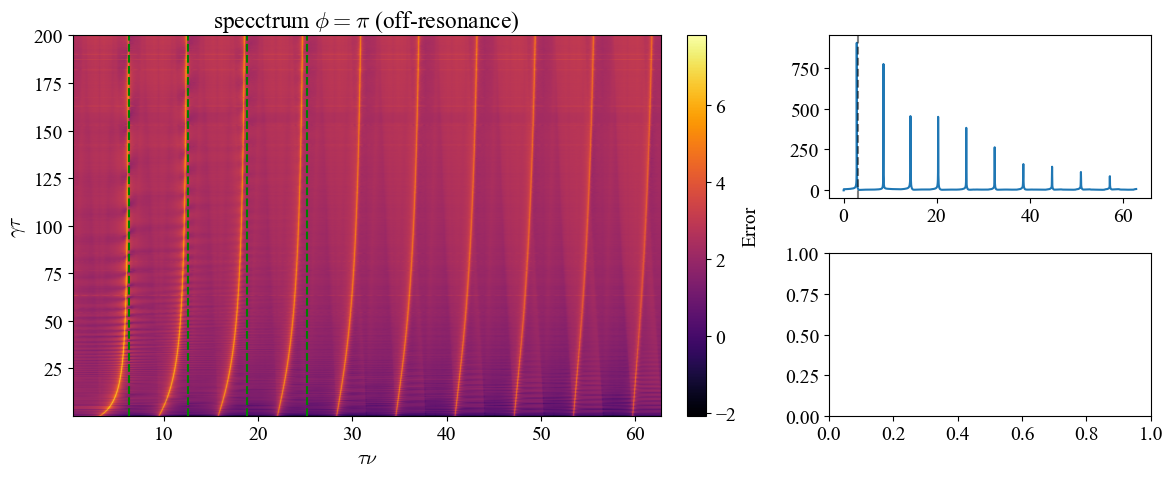

In [ ]:
# ------plot phi = pi tau = 1 -----------
map_plot_2 = u_map_p_1[:,10:]
t18 = 1.86
fig = plt.figure(figsize=(12, 5))
gs = gridspec.GridSpec(2, 2, width_ratios=[2, 1], height_ratios=[1, 1], figure=fig)

ax_heat = fig.add_subplot(gs[:, 0])
im = ax_heat.imshow(
	np.log(map_plot_2),
	origin='lower',
	aspect='auto',
	extent=[ w[10], w[-1],gamma_values[0], gamma_values[-1],],
	cmap='inferno'
)
ax_heat.set_xlabel(r'$  \tau \nu  $')
ax_heat.set_ylabel(r"$\gamma \tau $")
ax_heat.set_title(r'specctrum $\phi = \pi  $ (off-resonance) ')

ax_heat.axvline(2*np.pi, color='g', linestyle='--', linewidth=1.5)
ax_heat.axvline(4*np.pi, color='g', linestyle='--', linewidth=1.5)
ax_heat.axvline(6*np.pi, color='g', linestyle='--', linewidth=1.5)
ax_heat.axvline(8*np.pi, color='g', linestyle='--', linewidth=1.5)


cbar = fig.colorbar(im, ax=ax_heat, fraction=0.046, pad=0.04)
cbar.set_label('Error')

ax_top = fig.add_subplot(gs[0, 1])
ax_top.plot(w,u_map[180,:])
ax_top.axvline(np.pi/tau,color='k',linestyle ='--',alpha = 0.5)

ax_bottom = fig.add_subplot(gs[1, 1])

plt.tight_layout()
plt.show()

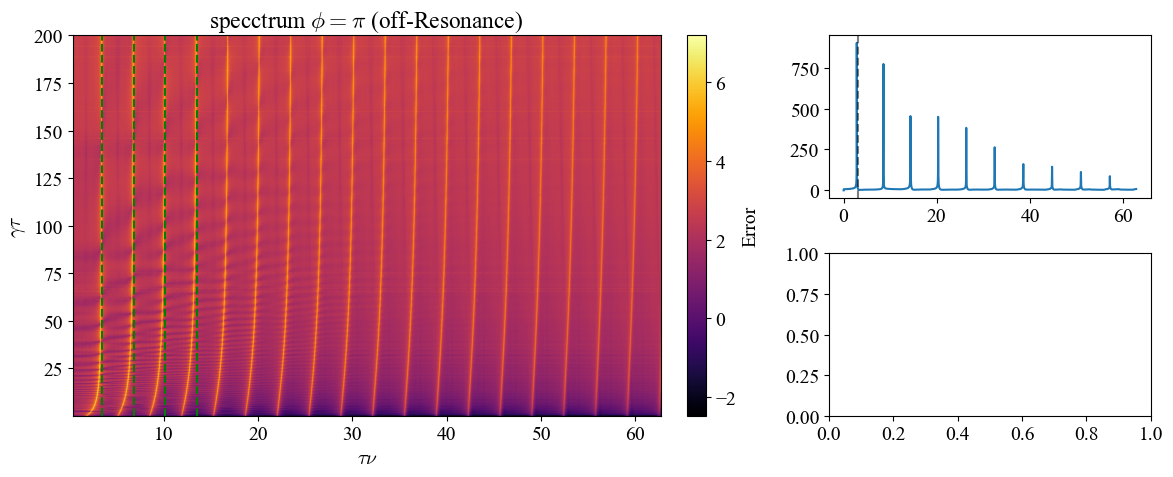

In [ ]:
# ---------- plot phi = pi tau = 1.8 ------------------
map_plot_2 = u_map_p_18[:,10:]
t18 = 1.86
fig = plt.figure(figsize=(12, 5))
gs = gridspec.GridSpec(2, 2, width_ratios=[2, 1], height_ratios=[1, 1], figure=fig)

ax_heat = fig.add_subplot(gs[:, 0])
im = ax_heat.imshow(
	np.log(map_plot_2),
	origin='lower',
	aspect='auto',
	extent=[ w[10], w[-1],gamma_values[0], gamma_values[-1],],
	cmap='inferno'
)
ax_heat.set_xlabel(r'$  \tau \nu  $')
ax_heat.set_ylabel(r"$\gamma \tau $")
ax_heat.set_title(r'specctrum $\phi = \pi  $ (off-Resonance) ')

ax_heat.axvline(2*np.pi/t18, color='g', linestyle='--', linewidth=1.5)
ax_heat.axvline(4*np.pi/t18, color='g', linestyle='--', linewidth=1.5)
ax_heat.axvline(6*np.pi/t18, color='g', linestyle='--', linewidth=1.5)
ax_heat.axvline(8*np.pi/t18, color='g', linestyle='--', linewidth=1.5)


cbar = fig.colorbar(im, ax=ax_heat, fraction=0.046, pad=0.04)
cbar.set_label('Error')

ax_top = fig.add_subplot(gs[0, 1])
ax_top.plot(w,u_map[180,:])
ax_top.axvline(np.pi/tau,color='k',linestyle ='--',alpha = 0.5)

ax_bottom = fig.add_subplot(gs[1, 1])

plt.tight_layout()
plt.show()

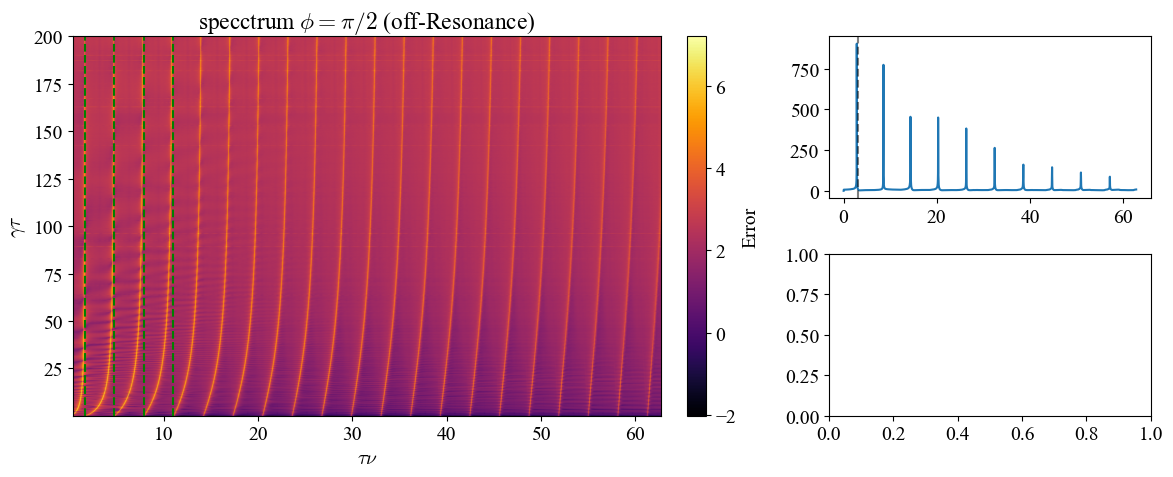

In [ ]:
# ---------- plot phi = pi/2 tau = 1.8 ------------------
map_plot_2 = u_map_p_half[:,10:]
t18 = 1.86
fig = plt.figure(figsize=(12, 5))
gs = gridspec.GridSpec(2, 2, width_ratios=[2, 1], height_ratios=[1, 1], figure=fig)

ax_heat = fig.add_subplot(gs[:, 0])
im = ax_heat.imshow(
	np.log(map_plot_2),
	origin='lower',
	aspect='auto',
	extent=[ w[10], w[-1],gamma_values[0], gamma_values[-1],],
	cmap='inferno'
)
ax_heat.set_xlabel(r'$  \tau \nu  $')
ax_heat.set_ylabel(r"$\gamma \tau $")
ax_heat.set_title(r'specctrum $\phi = \pi /2 $ (off-Resonance) ')

ax_heat.axvline(np.pi/2, color='g', linestyle='--', linewidth=1.5)
ax_heat.axvline(np.pi/2+np.pi, color='g', linestyle='--', linewidth=1.5)
ax_heat.axvline(np.pi/2+2*np.pi, color='g', linestyle='--', linewidth=1.5)
ax_heat.axvline(np.pi/2+3*np.pi, color='g', linestyle='--', linewidth=1.5)


cbar = fig.colorbar(im, ax=ax_heat, fraction=0.046, pad=0.04)
cbar.set_label('Error')

ax_top = fig.add_subplot(gs[0, 1])
ax_top.plot(w,u_map[180,:])
ax_top.axvline(np.pi/tau,color='k',linestyle ='--',alpha = 0.5)

ax_bottom = fig.add_subplot(gs[1, 1])

plt.tight_layout()
plt.show()



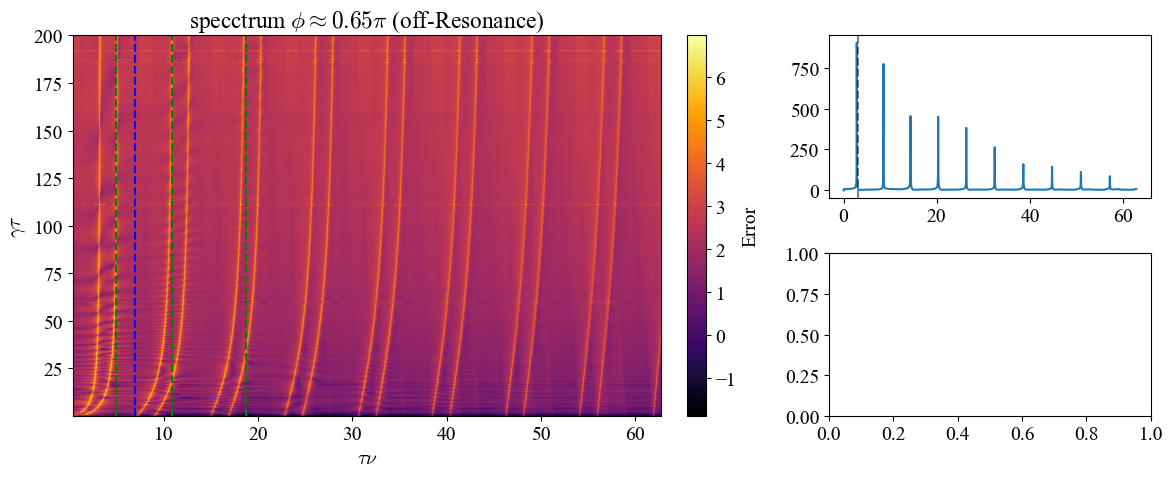

In [ ]:
# ---- plot with 'random' numbers -------------
map_plot_2 = u_map_any[:,2:]
phi_s = 1.76*np.pi
tau_s = 0.8
split = phi_s/(tau_s)
fig = plt.figure(figsize=(12, 5))
gs = gridspec.GridSpec(2, 2, width_ratios=[2, 1], height_ratios=[1, 1], figure=fig)

ax_heat = fig.add_subplot(gs[:, 0])
im = ax_heat.imshow(
	np.log(map_plot_2),
	origin='lower',
	aspect='auto',
	extent=[ w[10], w[-1],gamma_values[0], gamma_values[-1],],
	cmap='inferno'
)
ax_heat.set_xlabel(r'$  \tau \nu  $')
ax_heat.set_ylabel(r"$\gamma \tau $")
ax_heat.set_title(r'specctrum $\phi \approx 0.65 \pi $ (off-Resonance) ')

ax_heat.axvline(split, color='b', linestyle='--', linewidth=1.5)
ax_heat.axvline(np.pi/tau_s+split, color='g', linestyle='--', linewidth=1.5)
ax_heat.axvline(3*np.pi/tau_s+split, color='g', linestyle='--', linewidth=1.5)
ax_heat.axvline(3*np.pi/tau_s-split, color='g', linestyle='--', linewidth=1.5)






cbar = fig.colorbar(im, ax=ax_heat, fraction=0.046, pad=0.04)
cbar.set_label('Error')

ax_top = fig.add_subplot(gs[0, 1])
ax_top.plot(w,u_map[180,:])
ax_top.axvline(np.pi/tau,color='k',linestyle ='--',alpha = 0.5)

ax_bottom = fig.add_subplot(gs[1, 1])

plt.tight_layout()
plt.show()

Ok, rather than losing my time, I am going to see what happens in the limit $\gamma \tau >> 1$ as a function of $\phi$ 

# 2. Spectrum Vs $\phi$ in the $\gamma \tau >> 1$ limit 

In [ ]:
def sample_phi_NM(phi_value):
	gamma_sample=200
	tau_sample = 1.4
	model = new_cav_model(gamma_sample,phi_value,tau_sample)
	model.evolve(t_max,dt)
	t,_ = model.excited_state([1,0])
	a_out_flat = model.a_out_array[:,2]
	w,u = average_fft(t,a_out_flat,M_flatten)
	return w,u

In [388]:
phi_values = np.linspace(0,2*np.pi,100)

data_phi = paralelizar(phi_values,sample_phi_NM)
w_phi = np.asarray(data_phi)
u_map_phi = np.asarray( [data[1] for data in data_phi])

In [3]:
data = np.load("data_spectrum.npz")
data_phi=data['data_phi']
data_any=data['data_any']

phi_values = np.linspace(0,2*np.pi,100)
w_phi = np.asarray(data_phi)
w = w_phi[0][0]
u_map_phi = np.asarray( [data[1] for data in data_phi])

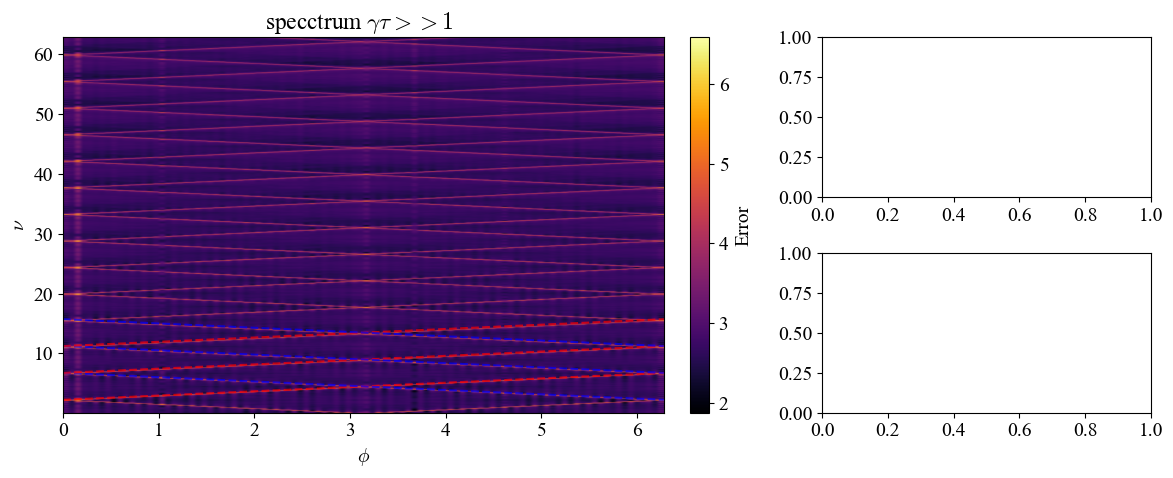

In [ ]:
# ---- plot gamma tau >> 1 -------------
map_plot_2 = u_map_phi[:,3:]
fig = plt.figure(figsize=(12, 5))
tau_s = 1.4 
gs = gridspec.GridSpec(2, 2, width_ratios=[2, 1], height_ratios=[1, 1], figure=fig)

#----------
ax_heat = fig.add_subplot(gs[:, 0])
im = ax_heat.imshow(
	np.log(map_plot_2.T),
	origin='lower',
	aspect='auto',
	extent=[ phi_values[0], phi_values[-1],w[3], w[-1]],
	cmap='inferno'
)
ax_heat.set_ylabel(r'$   \nu  $')
ax_heat.set_xlabel(r"$ \phi $")
ax_heat.set_title(r'specctrum $ \gamma \tau >> 1  $  ')
#--------------------  
for n in range(1,4):
	ax_heat.plot(phi_values,(2*n-1)*np.pi/tau_s+ phi_values/tau_s,linestyle='--',color='r',alpha=0.7)
	ax_heat.plot(phi_values,(2*n+1)*np.pi/tau_s- phi_values/tau_s,linestyle='--',color='b',alpha=0.7)

cbar = fig.colorbar(im, ax=ax_heat, fraction=0.046, pad=0.04)
cbar.set_label('Error')

ax_top = fig.add_subplot(gs[0, 1])

ax_bottom = fig.add_subplot(gs[1, 1])

plt.tight_layout()
plt.show()

In [427]:
np.savez('data_spectrum.npz', data_phi=data_phi, data_any=data_any)

In [22]:
w_phi = np.asarray(data_phi)
w = w_phi[0][0]
u_map_any = np.asarray( [data[1] for data in data_any])

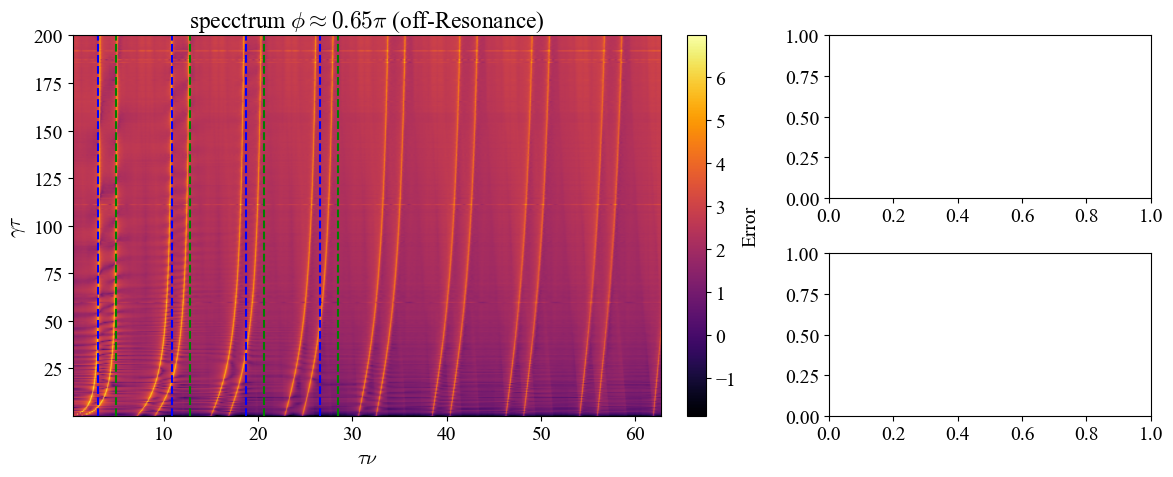

In [36]:
gamma_values = np.linspace(0.05,200,300)
map_plot_2 = u_map_any[:,2:]
phi_s = 1.76*np.pi
tau_s = 0.8
split = phi_s/(tau_s)
fig = plt.figure(figsize=(12, 5))
gs = gridspec.GridSpec(2, 2, width_ratios=[2, 1], height_ratios=[1, 1], figure=fig)

ax_heat = fig.add_subplot(gs[:, 0])
im = ax_heat.imshow(
	np.log(map_plot_2),
	origin='lower',
	aspect='auto',
	extent=[ w[10], w[-1],gamma_values[0], gamma_values[-1],],
	cmap='inferno'
)
ax_heat.set_xlabel(r'$  \tau \nu  $')
ax_heat.set_ylabel(r"$\gamma \tau $")
ax_heat.set_title(r'specctrum $\phi \approx 0.65 \pi $ (off-Resonance) ')

for n in range(0,4):
		ax_heat.axvline((2*n-1)*np.pi/tau_s +phi_s/tau_s, color='b', linestyle='--', linewidth=1.5)
		ax_heat.axvline((2*n+3)*np.pi/tau_s -phi_s/tau_s, color='g', linestyle='--', linewidth=1.5)


cbar = fig.colorbar(im, ax=ax_heat, fraction=0.046, pad=0.04)
cbar.set_label('Error')

ax_top = fig.add_subplot(gs[0, 1])


ax_bottom = fig.add_subplot(gs[1, 1])

plt.tight_layout()
plt.show()

I got it, in the asymptotic limit $\gamma \tau >> 1 $, The frequencies that appear are 
$$ \nu(\phi) = \frac{(2n+1)\pi \pm \phi}{\tau}  \quad \text{with } \quad n \in \mathbb{N}$$
My idea is that this must be somehow related to the fact that photons are now propagating through the waveguide (more in WQED regime that in JC)
The only thing I can think of is that the modes and the emitter evolve independently, each oscillating with their frequency, and when they 'see' each other, their phase is multiplied (like cosines) which results in this splitting, but this is a rather unphysical explanation 
